# Customer Segmentation using Clustering
***
This mini-project is based on [this blog post](http://blog.yhat.com/posts/customer-segmentation-using-python.html) by yhat. Please feel free to refer to the post for additional information, and solutions.

In [1]:
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

## Data

The dataset contains information on marketing newsletters/e-mail campaigns (e-mail offers sent to customers) and transaction level data from customers. The transactional data shows which offer customers responded to, and what the customer ended up buying. The data is presented as an Excel workbook containing two worksheets. Each worksheet contains a different dataset.

In [3]:
df_offers = pd.read_excel("C:/Users/jlpar/Documents/Springboard Data Files/WineKMC.xlsx", sheetname=0)
df_offers.columns = ["offer_id", "campaign", "varietal", "min_qty", "discount", "origin", "past_peak"]
df_offers.head()

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


In [4]:
df_offers.varietal.unique()

array(['Malbec', 'Pinot Noir', 'Espumante', 'Champagne',
       'Cabernet Sauvignon', 'Prosecco', 'Chardonnay', 'Merlot',
       'Pinot Grigio'], dtype=object)

We see that the first dataset contains information about each offer such as the month it is in effect and several attributes about the wine that the offer refers to: the variety, minimum quantity, discount, country of origin and whether or not it is past peak. The second dataset in the second worksheet contains transactional data -- which offer each customer responded to.

In [5]:
df_transactions = pd.read_excel("C:/Users/jlpar/Documents/Springboard Data Files/WineKMC.xlsx", sheetname=1)
df_transactions.columns = ["customer_name", "offer_id"]
df_transactions['n'] = 1
df_transactions.head()

,customer_name,offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


## Data wrangling

We're trying to learn more about how our customers behave, so we can use their behavior (whether or not they purchased something based on an offer) as a way to group similar minded customers together. We can then study those groups to look for patterns and trends which can help us formulate future offers.

The first thing we need is a way to compare customers. To do this, we're going to create a matrix that contains each customer and a 0/1 indicator for whether or not they responded to a given offer. 

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a data frame where each row has the following columns (Use the pandas [`merge`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) and [`pivot_table`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) functions for this purpose):
<ul>
<li> customer_name
<li> One column for each offer, with a 1 if the customer responded to the offer
</ul>
<p>Make sure you also deal with any weird values such as `NaN`. Read the documentation to develop your solution.</p>
</div>

In [6]:
# https://chrisalbon.com/python/data_wrangling/pandas_join_merge_dataframe/
# merge the files

df = pd.merge(df_offers, df_transactions)


# create the pivot table
matrix = df.pivot_table(index= 'customer_name', columns='offer_id', values= 'n')
matrix.head()

offer_id,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
customer_name,,,,,,,,,,,,,,,,,,,,,
Adams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
Allen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Anderson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Bailey,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Baker,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [7]:
# change NAN to 0
matrix = matrix.fillna(0).reset_index()
matrix.head()

offer_id,customer_name,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## K-Means Clustering

Recall that in K-Means Clustering we want to *maximize* the distance between centroids and *minimize* the distance between data points and the respective centroid for the cluster they are in. True evaluation for unsupervised learning would require labeled data; however, we can use a variety of intuitive metrics to try to pick the number of clusters K. We will introduce two methods: the Elbow method, the Silhouette method and the gap statistic.

### Choosing K: The Elbow Sum-of-Squares Method

The first method looks at the sum-of-squares error in each cluster against $K$. We compute the distance from each data point to the center of the cluster (centroid) to which the data point was assigned. 

$$SS = \sum_k \sum_{x_i \in C_k} \sum_{x_j \in C_k} \left( x_i - x_j \right)^2 = \sum_k \sum_{x_i \in C_k} \left( x_i - \mu_k \right)^2$$

where $x_i$ is a point, $C_k$ represents cluster $k$ and $\mu_k$ is the centroid for cluster $k$. We can plot SS vs. $K$ and choose the *elbow point* in the plot as the best value for $K$. The elbow point is the point at which the plot starts descending much more slowly. 

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set II</h3>

<p><b>Exercise:</b></p> 
<ul>
<li> What values of $SS$ do you believe represent better clusterings? Why?
<li> Create a numpy matrix `x_cols` with only the columns representing the offers (i.e. the 0/1 colums) 
<li> Write code that applies the [`KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering method from scikit-learn to this matrix. 
<li> Construct a plot showing $SS$ for each $K$ and pick $K$ using this plot. For simplicity, test $2 \le K \le 10$.
<li> Make a bar chart showing the number of points in each cluster for k-means under the best $K$.
<li> What challenges did you experience using the Elbow method to pick $K$?
</ul>
</div>

What values of  𝑆𝑆  do you believe represent better clusterings? Why?

The K-means divides the data into K Clusters by minimizing the sum of squared distances of each record to the mean of the assigned cluster and is called the within cluster sum of squares.  The values of SS that best represent the cluster would be the ones that have a minimal sum of squares.  K-means does not mean the clusters will have the same size but finds the clusters that are best separated.  

In [9]:
# your turn
matrix.columns

Index(['customer_name',               1,               2,               3,
                     4,               5,               6,               7,
                     8,               9,              10,              11,
                    12,              13,              14,              15,
                    16,              17,              18,              19,
                    20,              21,              22,              23,
                    24,              25,              26,              27,
                    28,              29,              30,              31,
                    32],
      dtype='object', name='offer_id')

In [10]:
# create the matrix called x_cols which has only the columns with transaction data (no customer names)
x_cols = matrix.iloc[:,1:]
x_cols.head()

offer_id,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# define the range of K's to test
K_range = range(2,11)

# initialize a dictionary to store the sum of squares (ss) values for each K
SSE = {}


# for each K, fit the model, calculate the distances from the data to the centroids and get ss
for K in K_range:
    K_means = KMeans(n_clusters= K, random_state = 5).fit(x_cols)  
    centroids = K_means.cluster_centers_ 
    K_euclid = cdist(x_cols,centroids, 'euclidean') 
    dist = np.min(K_euclid, axis=1) 
    squares = np.square(dist)
    ss = sum(squares)
    SSE[K] = ss

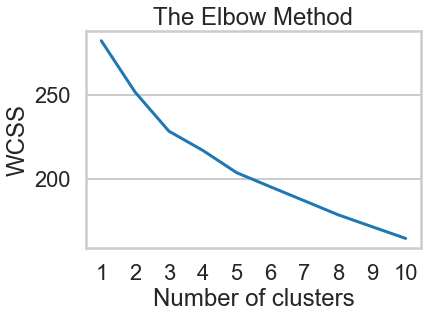

In [12]:
## Construct a plot showing  𝑆𝑆  for each  𝐾  and pick  𝐾  using this plot. For simplicity,  .

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x_cols)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.grid(which='major', axis='x')
plt.show()

In [17]:
# fit the model for K = 3
K_means = KMeans(n_clusters= 3).fit_predict(x_cols)

# store the cluster assignments in the matrix
matrix['cluster'] = K_means
matrix.head()

offer_id,customer_name,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,cluster
0,Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1
1,Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2,Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [18]:
## Printing K means for the x_cols
K_means

array([1, 0, 2, 1, 0, 0, 2, 1, 0, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 0, 1, 1,
       0, 0, 2, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 2, 1, 1, 0, 0, 1, 0, 1, 1, 2,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 2, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0])

In [19]:
# Printing the Sumd of squares values
ss

169.20027472527474

In [20]:
# These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
labels = kmeans.labels_

# It's separated everyone into clusters based on ID 
print(pd.crosstab(labels, matrix["cluster"]))

cluster   0   1   2
row_0              
0         9   0   0
1         0  16   0
2         0   0  14
3         4   1   0
4        12   8   2
5         5   0   0
6        10   1   0
7         2   0   0
8         1  11   0
9         4   0   0


In [21]:
# count number of data points in each cluster
num_per_cluster = matrix.cluster.value_counts()


def categorical_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', verbose=True):
    if x == None:
        column_interested = y
    else:
        column_interested = x
    series = dataframe[column_interested]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())

    sns.countplot(x=x, y=y, hue=hue, data=dataframe, palette=palette)
    plt.show()

count    100.000000
mean       1.070000
std        0.807227
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: cluster, dtype: float64
mode:  0    2
dtype: int32
2    36
1    35
0    29
Name: cluster, dtype: int64


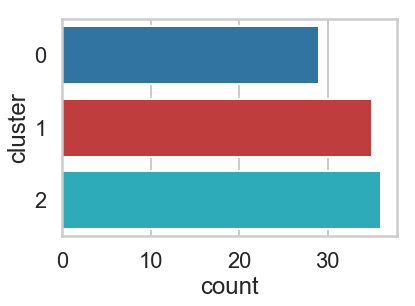

In [44]:
## Printing a Horizontal Bar Graph with summary statistics 

c_palette = ['tab:blue', 'tab:red', 'tab:cyan']
categorical_summarized(matrix, y = 'cluster', palette=c_palette)

plt.show()

What challenges did you experience using the Elbow method to pick  𝐾 ?

There are several methods to select the k in k-means clusters and one of these is the "elbow method".  The elbow method is the point where the culmulative variance explained flattens out after rising steeply and is selected by the human eye to see the bend in the plot.  We are ploting the within cluster sum of squares to determine the best or appropriate cluster number for our dataset.  


### Choosing K: The Silhouette Method

There exists another method that measures how well each datapoint $x_i$ "fits" its assigned cluster *and also* how poorly it fits into other clusters. This is a different way of looking at the same objective. Denote $a_{x_i}$ as the *average* distance from $x_i$ to all other points within its own cluster $k$. The lower the value, the better. On the other hand $b_{x_i}$ is the minimum average distance from $x_i$ to points in a different cluster, minimized over clusters. That is, compute separately for each cluster the average distance from $x_i$ to the points within that cluster, and then take the minimum. The silhouette $s(x_i)$ is defined as

$$s(x_i) = \frac{b_{x_i} - a_{x_i}}{\max{\left( a_{x_i}, b_{x_i}\right)}}$$

The silhouette score is computed on *every datapoint in every cluster*. The silhouette score ranges from -1 (a poor clustering) to +1 (a very dense clustering) with 0 denoting the situation where clusters overlap. Some criteria for the silhouette coefficient is provided in the table below.

<pre>

| Range       | Interpretation                                |
|-------------|-----------------------------------------------|
| 0.71 - 1.0  | A strong structure has been found.            |
| 0.51 - 0.7  | A reasonable structure has been found.        |
| 0.26 - 0.5  | The structure is weak and could be artificial.|
| < 0.25      | No substantial structure has been found.      |

</pre>
Source: http://www.stat.berkeley.edu/~spector/s133/Clus.html

Fortunately, scikit-learn provides a function to compute this for us (phew!) called [`sklearn.metrics.silhouette_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html). Take a look at [this article](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) on picking $K$ in scikit-learn, as it will help you in the next exercise set.

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Using the documentation for the `silhouette_score` function above, construct a series of silhouette plots like the ones in the article linked above.</p>

<p><b>Exercise:</b> Compute the average silhouette score for each $K$ and plot it. What $K$ does the plot suggest we should choose? Does it differ from what we found using the Elbow method?</p>
</div>

In [22]:
# Your turn.
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

The average silhouette_score is :  0.09174871508750351


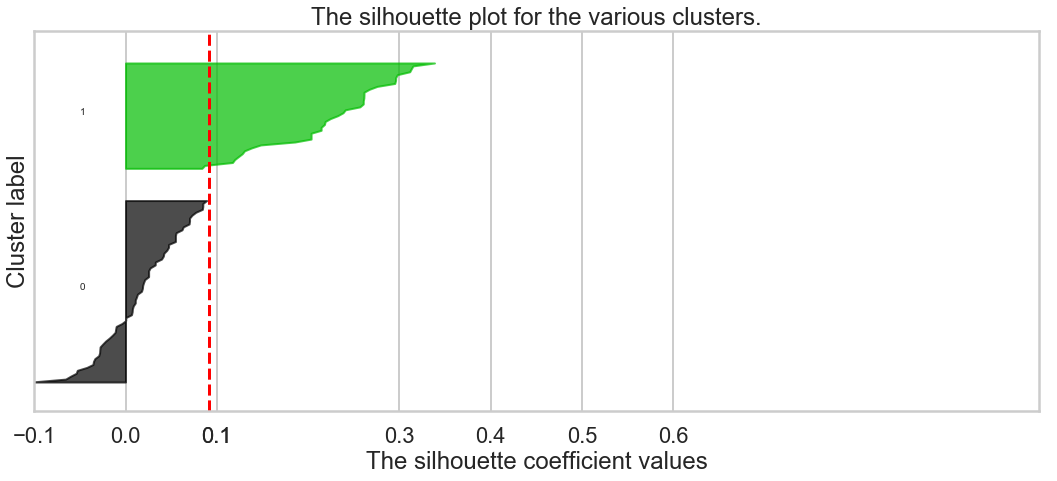

The average silhouette_score is :  0.1176998005869721


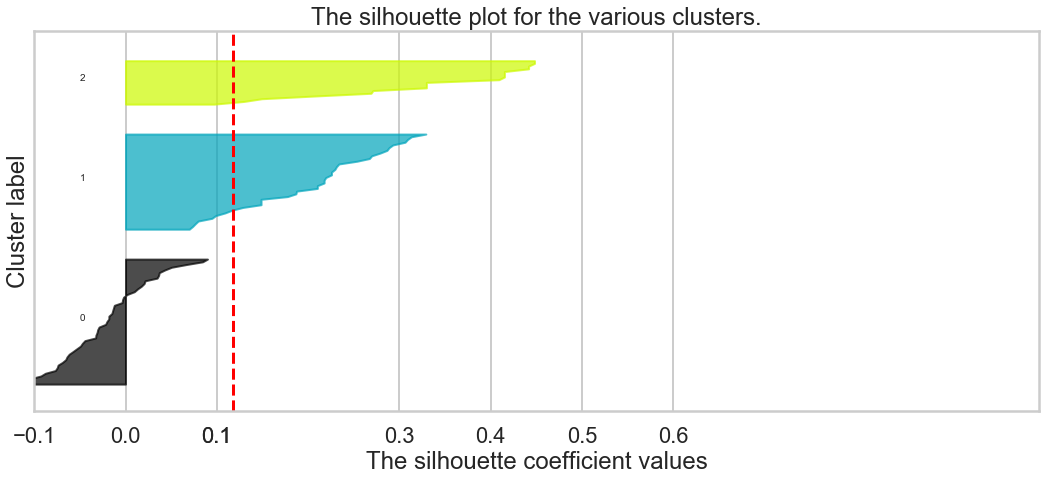

The average silhouette_score is :  0.11470520492597679


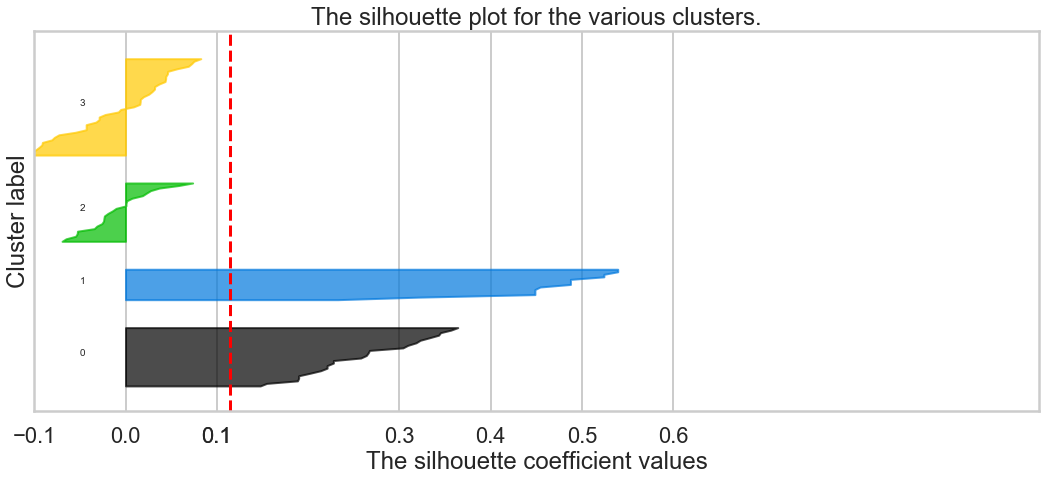

The average silhouette_score is :  0.12090963033272623


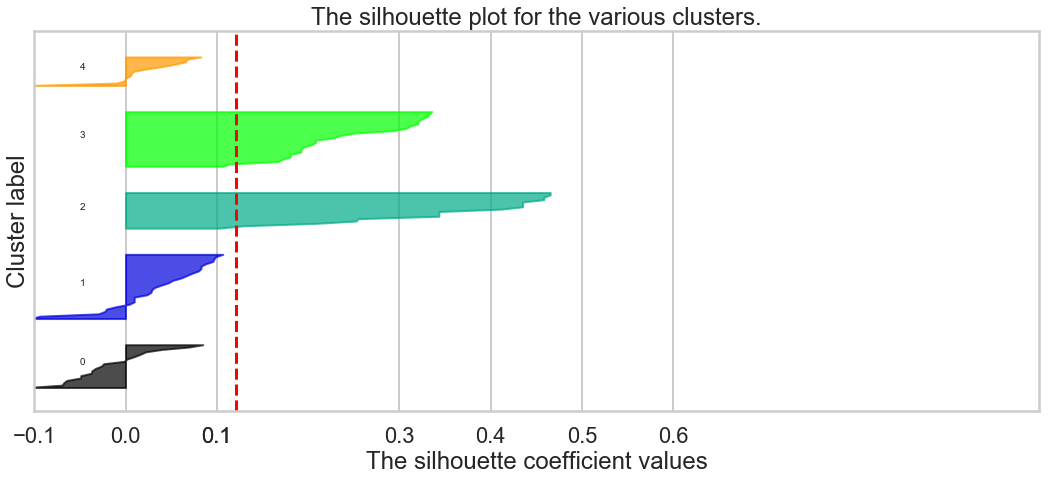

The average silhouette_score is :  0.12146174271801277


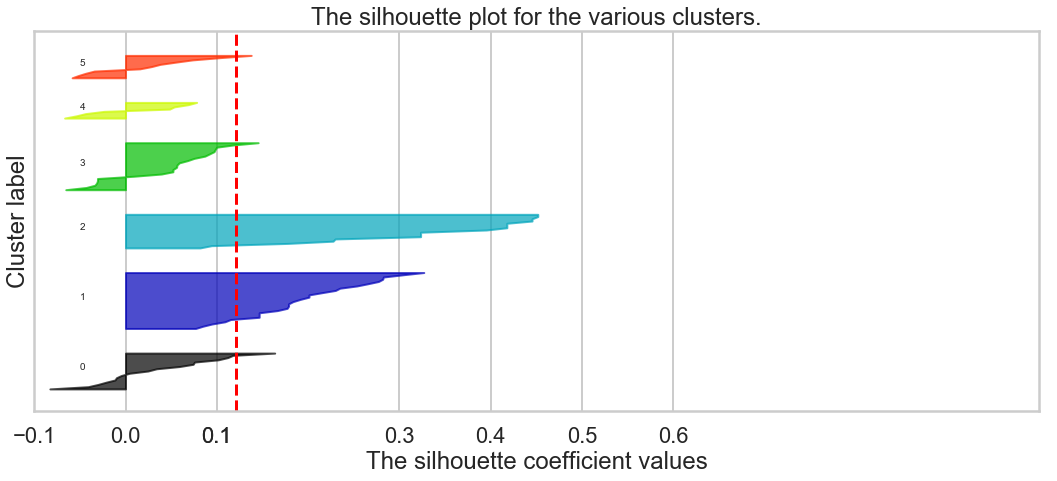

The average silhouette_score is :  0.12015624578775488


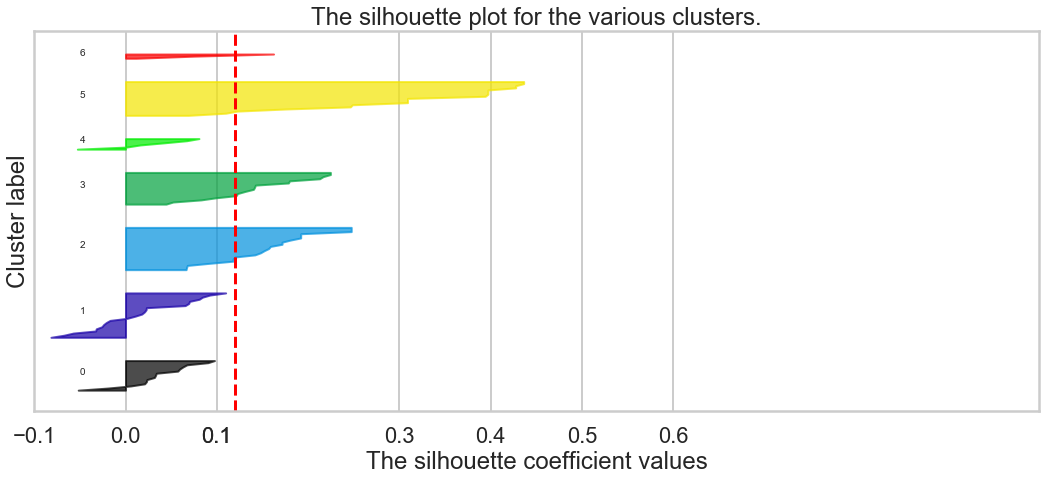

The average silhouette_score is :  0.12398782106926276


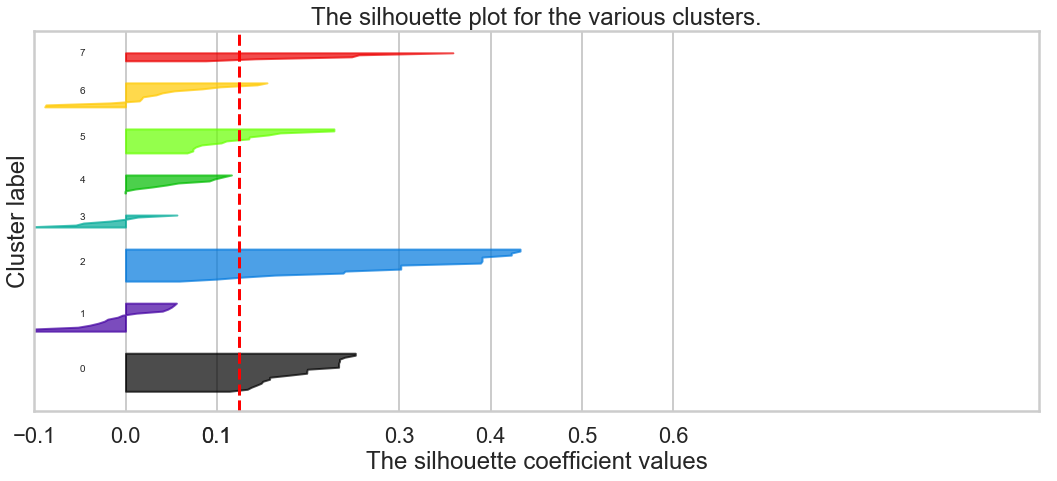

The average silhouette_score is :  0.12129837343048354


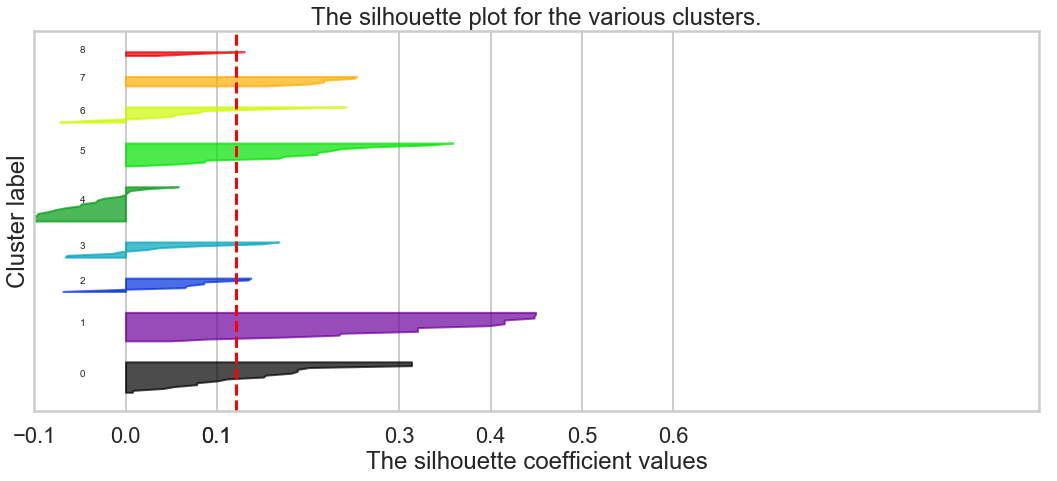

The average silhouette_score is :  0.11388045928971953


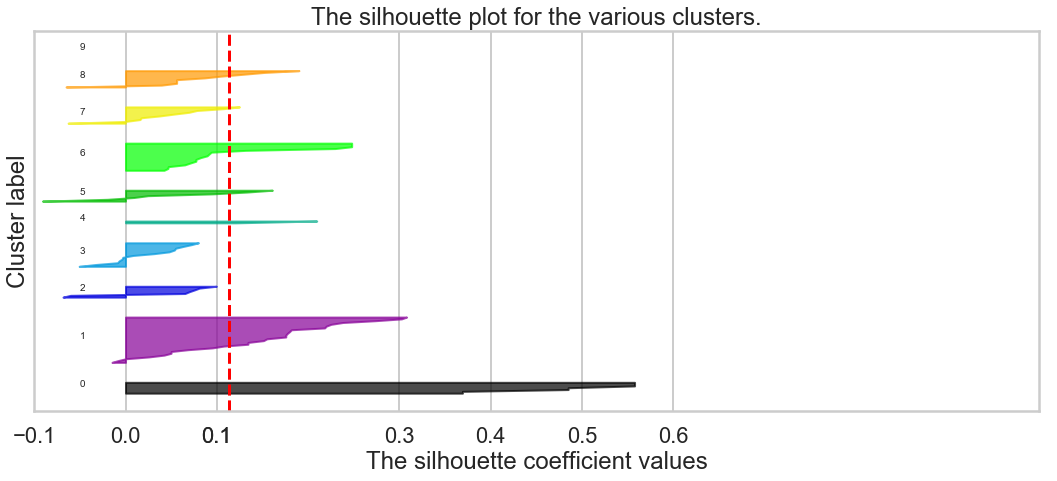

In [23]:
## Reference https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#
scores = {}

# for each K, create a silhouette plot and store the avg sillhouette score
for K in K_range:
    
    # create a subplot 
    fig, ax1 = plt.subplots()
    fig.set_size_inches(18, 7)
    
    # create the silhouette plot, set x axis limits
    ax1.set_xlim([-0.1, 1])
    
    # insert some blank space between the plots for demarcation
    ax1.set_ylim([0, len(x_cols) + (K + 1) * 10])
    
    # do kmeans clustering, set random-state = 5 for reproducibility
    clusterer = KMeans(n_clusters= K, random_state=5)
    cluster_labels = clusterer.fit_predict(x_cols)
    
    # get silhouette scores and print
    silhouette_avg = silhouette_score(x_cols, cluster_labels)
    scores[K] = silhouette_avg
    print("The average silhouette_score is : ", silhouette_avg)
    
    # compute silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x_cols, cluster_labels)
    
    y_lower = 10
    for i in range(K):
    # aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
    
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
    
        color = cm.nipy_spectral(float(i) / K)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
    
    # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.1, 0.1, 0.3, 0.4, 0.5, 0.6])
    
    plt.show()


Compute the average silhouette score for each  𝐾  and plot it. What  𝐾  does the plot suggest we should choose? Does it differ from what we found using the Elbow method?

The average silhouete coefficient score ranged from 0.09 for two clusters up to 0.124 for a total of 7 clusters in the silhouette assignment.  The values given to us above show that a negative score will mean poor clustering, a value around 0 means overlap and a value greater than 0.5 is a reasonable to 0.7 a good clustering score for this method and dataset.  The best value was 0.124 for a total of 7 clusters and this is below the 0.25 threshold and is not a good reasonable clustering approach for this model at this time.  

### Choosing $K$: The Gap Statistic

There is one last method worth covering for picking $K$, the so-called Gap statistic. The computation for the gap statistic builds on the sum-of-squares established in the Elbow method discussion, and compares it to the sum-of-squares of a "null distribution," that is, a random set of points with no clustering. The estimate for the optimal number of clusters $K$ is the value for which $\log{SS}$ falls the farthest below that of the reference distribution:

$$G_k = E_n^*\{\log SS_k\} - \log SS_k$$

In other words a good clustering yields a much larger difference between the reference distribution and the clustered data. The reference distribution is a Monte Carlo (randomization) procedure that constructs $B$ random distributions of points within the bounding box (limits) of the original data and then applies K-means to this synthetic distribution of data points.. $E_n^*\{\log SS_k\}$ is just the average $SS_k$ over all $B$ replicates. We then compute the standard deviation $\sigma_{SS}$ of the values of $SS_k$ computed from the $B$ replicates of the reference distribution and compute

$$s_k = \sqrt{1+1/B}\sigma_{SS}$$

Finally, we choose $K=k$ such that $G_k \geq G_{k+1} - s_{k+1}$.

### Aside: Choosing $K$ when we Have Labels

Unsupervised learning expects that we do not have the labels. In some situations, we may wish to cluster data that is labeled. Computing the optimal number of clusters is much easier if we have access to labels. There are several methods available. We will not go into the math or details since it is rare to have access to the labels, but we provide the names and references of these measures.

* Adjusted Rand Index
* Mutual Information
* V-Measure
* Fowlkes–Mallows index

See [this article](http://scikit-learn.org/stable/modules/clustering.html) for more information about these metrics.

## Visualizing Clusters using PCA

How do we visualize clusters? If we only had two features, we could likely plot the data as is. But we have 100 data points each containing 32 features (dimensions). Principal Component Analysis (PCA) will help us reduce the dimensionality of our data from 32 to something lower. For a visualization on the coordinate plane, we will use 2 dimensions. In this exercise, we're going to use it to transform our multi-dimensional dataset into a 2 dimensional dataset.

This is only one use of PCA for dimension reduction. We can also use PCA when we want to perform regression but we have a set of highly correlated variables. PCA untangles these correlations into a smaller number of features/predictors all of which are orthogonal (not correlated). PCA is also used to reduce a large set of variables into a much smaller one.

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set IV</h3>

<p><b>Exercise:</b> Use PCA to plot your clusters:</p>

<ul>
<li> Use scikit-learn's [`PCA`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) function to reduce the dimensionality of your clustering data to 2 components
<li> Create a data frame with the following fields:
  <ul>
  <li> customer name
  <li> cluster id the customer belongs to
  <li> the two PCA components (label them `x` and `y`)
  </ul>
<li> Plot a scatterplot of the `x` vs `y` columns
<li> Color-code points differently based on cluster ID
<li> How do the clusters look? 
<li> Based on what you see, what seems to be the best value for $K$? Moreover, which method of choosing $K$ seems to have produced the optimal result visually?
</ul>

<p><b>Exercise:</b> Now look at both the original raw data about the offers and transactions and look at the fitted clusters. Tell a story about the clusters in context of the original data. For example, do the clusters correspond to wine variants or something else interesting?</p>
</div>

In [24]:
#your turn
K_means = KMeans(n_clusters= 3, random_state= 5).fit_predict(x_cols) 
matrix['cluster'] = K_means

In [25]:
matrix.head(3)

offer_id,customer_name,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,cluster
0,Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1
1,Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2,Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [26]:
#Create a data frame with the following fields, customer name, cluster id the customer belongs to
# and the two PCA components (label them `x` and `y`)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
matrix['x'] = pca.fit_transform(x_cols)[:,0]
matrix['y'] = pca.fit_transform(x_cols)[:,1]

matrix.head()

print('PCA Explained Variance', pca.explained_variance_ratio_)  
print('PCA Single Values',pca.singular_values_)  

PCA Explained Variance [0.14386393 0.10800289]
PCA Single Values [6.36829969 5.51779083]


In [27]:
matrix.head(3)

offer_id,customer_name,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,cluster,x,y
0,Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1,1.007580,0.108215
1,Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,-0.287539,0.044715
2,Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,-0.392032,1.038391


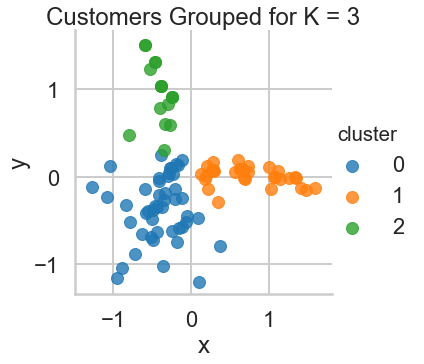

In [28]:
#  Plotting Customers based by Clusters
sns.lmplot(x='x', y='y', hue='cluster', data=matrix, fit_reg=False)
plt.title('Customers Grouped for K = 3')
plt.show()

In [29]:
# merge the transactions file with customer clusters file and then merge with offers file so we can interpret the clusters
customer_clusters = matrix[['customer_name','cluster']]
df = pd.merge(df_transactions, customer_clusters)
data = pd.merge(df_offers, df)
data.head(3)

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak,customer_name,n,cluster
0,1,January,Malbec,72,56,France,False,Thomas,1,0
1,1,January,Malbec,72,56,France,False,Jackson,1,0
2,1,January,Malbec,72,56,France,False,Mitchell,1,2


In [30]:
# how many customers per cluster
data.groupby('cluster').customer_name.nunique()

cluster
0    47
1    36
2    17
Name: customer_name, dtype: int64

In [31]:
# group the data by cluster and then varietal
data_sorted = data.groupby(['cluster','varietal'], as_index=False).n.agg(np.sum)

In [33]:
# group the data by cluster and then varietal
data_sorted2 = data.groupby(['cluster','origin'], as_index=False).n.agg(np.sum)

Text(0.5, 33.80000000000001, 'Cluster Number')

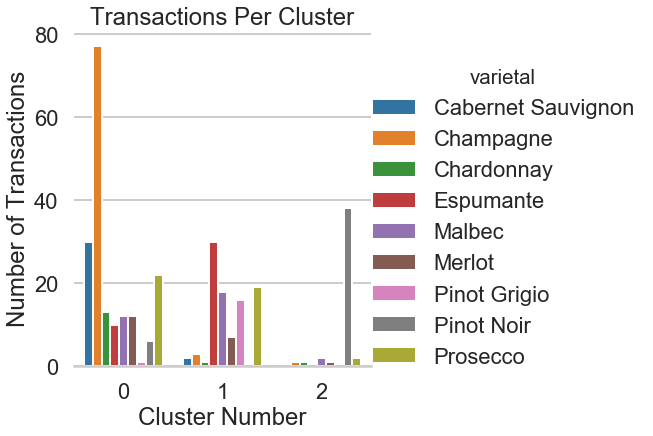

In [34]:
# make a seaborn factorplot
g = sns.factorplot(x='cluster', y='n', hue='varietal', kind='bar', data=data_sorted, size=6) 
g.despine(left=True)
plt.title('Transactions Per Cluster')
plt.ylabel("Number of Transactions")
plt.xlabel("Cluster Number")

Text(0.5, 33.80000000000001, 'Cluster Number')

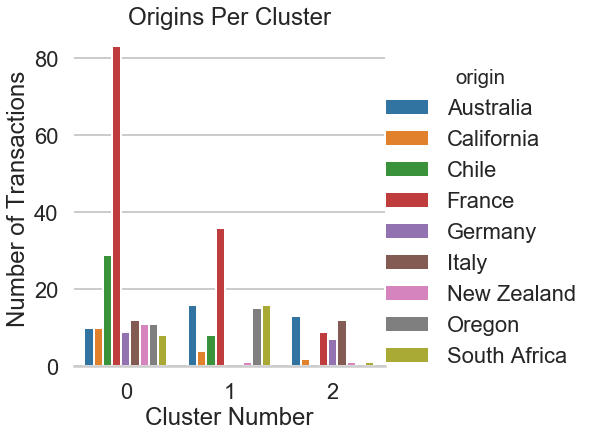

In [35]:
# make a seaborn factorplot
g = sns.factorplot(x='cluster', y='n', hue='origin', kind='bar', data=data_sorted2, size=6) 
g.despine(left=True)
plt.title('Origins Per Cluster')
plt.ylabel("Number of Transactions")
plt.xlabel("Cluster Number")

Exercise: Now look at both the original raw data about the offers and transactions and look at the fitted clusters. Tell a story about the clusters in context of the original data. For example, do the clusters correspond to wine variants or something else interesting?

The seaborn scatterplot was used for grouped data based on Variety and Origin for the wines and the plots can be seen above.  The first cluster analysis that used only three clusters did a good job in separating four of the nine different varieties into three clusters.  The Cabernet Sauvignon and Champagne was separated into cluster zero, the Pinot Grigo was placed into cluster 1 and finally the Pinot Noir was separated nicely into cluster 2 for this model.  The other wine varieties had mixed results and were in different sets of clusters.

The Origin had a mixed set of clusters and this did not do a good job in separating the origins for this dataset.  Cluster 0 had all nine origins for this dataset and then these were also found in the other two clusters so this really did not do well in separating the origins for the dataset.  

What we've done is we've taken those columns of 0/1 indicator variables, and we've transformed them into a 2-D dataset. We took one column and arbitrarily called it `x` and then called the other `y`. Now we can throw each point into a scatterplot. We color coded each point based on it's cluster so it's easier to see them.

<div class="span5 alert alert-info">
<h3>Exercise Set V</h3>

<p>As we saw earlier, PCA has a lot of other uses. Since we wanted to visualize our data in 2 dimensions, restricted the number of dimensions to 2 in PCA. But what is the true optimal number of dimensions?</p>

<p><b>Exercise:</b> Using a new PCA object shown in the next cell, plot the `explained_variance_` field and look for the elbow point, the point where the curve's rate of descent seems to slow sharply. This value is one possible value for the optimal number of dimensions. What is it?</p>
</div>

In [36]:
#your turn
# Initialize a new PCA model with a default number of components.
import sklearn.decomposition
pca = sklearn.decomposition.PCA()
pca.fit(x_cols)

# Do the rest on your own :)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [37]:
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [38]:
# create the pandas dataframe for easy plotting
pca_var = pd.DataFrame(pca.explained_variance_)

Text(0, 0.5, 'explained_variance_')

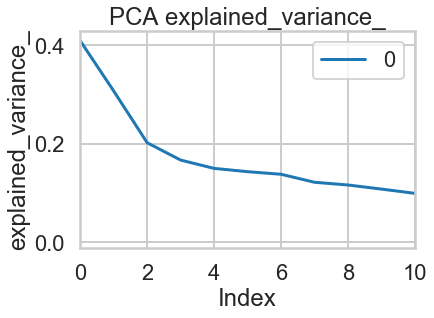

In [39]:
# plot the explained_variance_ field
pca_var.plot()
plt.title('PCA explained_variance_')
plt.xlim(0,10)
plt.xlabel('Index')
plt.ylabel('explained_variance_')

Exercise: Using a new PCA object shown in the next cell, plot the `explained_variance_` field and look for the elbow point, the point where the curve's rate of descent seems to slow sharply. 

The PCA Plot for PCA Explained Variance has several elbows and one is at an Index of 2, 6 and 7 for this data set.  I do see a slight elbow at an Index of 3 and this is what we saw before in the "Elbow Method".

## Other Clustering Algorithms

k-means is only one of a ton of clustering algorithms. Below is a brief description of several clustering algorithms, and the table provides references to the other clustering algorithms in scikit-learn. 

* **Affinity Propagation** does not require the number of clusters $K$ to be known in advance! AP uses a "message passing" paradigm to cluster points based on their similarity. 

* **Spectral Clustering** uses the eigenvalues of a similarity matrix to reduce the dimensionality of the data before clustering in a lower dimensional space. This is tangentially similar to what we did to visualize k-means clusters using PCA. The number of clusters must be known a priori.

* **Ward's Method** applies to hierarchical clustering. Hierarchical clustering algorithms take a set of data and successively divide the observations into more and more clusters at each layer of the hierarchy. Ward's method is used to determine when two clusters in the hierarchy should be combined into one. It is basically an extension of hierarchical clustering. Hierarchical clustering is *divisive*, that is, all observations are part of the same cluster at first, and at each successive iteration, the clusters are made smaller and smaller. With hierarchical clustering, a hierarchy is constructed, and there is not really the concept of "number of clusters." The number of clusters simply determines how low or how high in the hierarchy we reference and can be determined empirically or by looking at the [dendogram](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.cluster.hierarchy.dendrogram.html).

* **Agglomerative Clustering** is similar to hierarchical clustering but but is not divisive, it is *agglomerative*. That is, every observation is placed into its own cluster and at each iteration or level or the hierarchy, observations are merged into fewer and fewer clusters until convergence. Similar to hierarchical clustering, the constructed hierarchy contains all possible numbers of clusters and it is up to the analyst to pick the number by reviewing statistics or the dendogram.

* **DBSCAN** is based on point density rather than distance. It groups together points with many nearby neighbors. DBSCAN is one of the most cited algorithms in the literature. It does not require knowing the number of clusters a priori, but does require specifying the neighborhood size.

### Clustering Algorithms in Scikit-learn
<table border="1">
<colgroup>
<col width="15%" />
<col width="16%" />
<col width="20%" />
<col width="27%" />
<col width="22%" />
</colgroup>
<thead valign="bottom">
<tr><th>Method name</th>
<th>Parameters</th>
<th>Scalability</th>
<th>Use Case</th>
<th>Geometry (metric used)</th>
</tr>
</thead>
<tbody valign="top">
<tr><td>K-Means</span></a></td>
<td>number of clusters</td>
<td>Very large<span class="pre">n_samples</span>, medium <span class="pre">n_clusters</span> with
MiniBatch code</td>
<td>General-purpose, even cluster size, flat geometry, not too many clusters</td>
<td>Distances between points</td>
</tr>
<tr><td>Affinity propagation</td>
<td>damping, sample preference</td>
<td>Not scalable with n_samples</td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr><td>Mean-shift</td>
<td>bandwidth</td>
<td>Not scalable with <span class="pre">n_samples</span></td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Distances between points</td>
</tr>
<tr><td>Spectral clustering</td>
<td>number of clusters</td>
<td>Medium <span class="pre">n_samples</span>, small <span class="pre">n_clusters</span></td>
<td>Few clusters, even cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr><td>Ward hierarchical clustering</td>
<td>number of clusters</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints</td>
<td>Distances between points</td>
</tr>
<tr><td>Agglomerative clustering</td>
<td>number of clusters, linkage type, distance</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints, non Euclidean
distances</td>
<td>Any pairwise distance</td>
</tr>
<tr><td>DBSCAN</td>
<td>neighborhood size</td>
<td>Very large <span class="pre">n_samples</span>, medium <span class="pre">n_clusters</span></td>
<td>Non-flat geometry, uneven cluster sizes</td>
<td>Distances between nearest points</td>
</tr>
<tr><td>Gaussian mixtures</td>
<td>many</td>
<td>Not scalable</td>
<td>Flat geometry, good for density estimation</td>
<td>Mahalanobis distances to  centers</td>
</tr>
<tr><td>Birch</td>
<td>branching factor, threshold, optional global clusterer.</td>
<td>Large <span class="pre">n_clusters</span> and <span class="pre">n_samples</span></td>
<td>Large dataset, outlier removal, data reduction.</td>
<td>Euclidean distance between points</td>
</tr>
</tbody>
</table>
Source: http://scikit-learn.org/stable/modules/clustering.html

<div class="span5 alert alert-info">
<h3>Exercise Set VI</h3>

<p><b>Exercise:</b> Try clustering using the following algorithms. </p>
<ol>
<li>Affinity propagation
<li>Spectral clustering
<li>Agglomerative clustering
<li>DBSCAN
</ol>
<p>How do their results compare? Which performs the best? Tell a story why you think it performs the best.</p>
</div>


In [ ]:
# Your turn

In [40]:
from sklearn.cluster import AffinityPropagation

# Using AffinityPropagation to determine the best number of clusters
af = AffinityPropagation(damping = 0.5).fit(x_cols)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
matrix['cluster'] = labels
n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: {}'.format(n_clusters_))
print(silhouette_score)

Estimated number of clusters: 14
<function silhouette_score at 0x0000022CAAF41AE8>


In [41]:
print(silhouette_score)

<function silhouette_score at 0x0000022CAAF41AE8>


In [42]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# using the standard 3 clusters as determined in previous Elbow Model
af2 = AffinityPropagation(damping = 0.5).fit(x_cols)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
matrix['cluster'] = labels
n_clusters_ = 3

print('Estimated number of clusters: {}'.format(n_clusters_))
print(silhouette_score)

Estimated number of clusters: 3
<function silhouette_score at 0x0000022CAAF41AE8>


In [43]:
 from sklearn.cluster import SpectralClustering
# set n_clusters = 3 to do an "apples to apples" comparison with Kmeans we did above
spectral = SpectralClustering(n_clusters=3, random_state = 5).fit(x_cols)

labels = spectral.labels_
matrix['cluster'] = labels
silhouette_score = metrics.silhouette_score(x_cols, labels, metric='sqeuclidean')
print('Silhouette Coefficient: {}'.format(silhouette_score))

Silhouette Coefficient: 0.14868834314848878


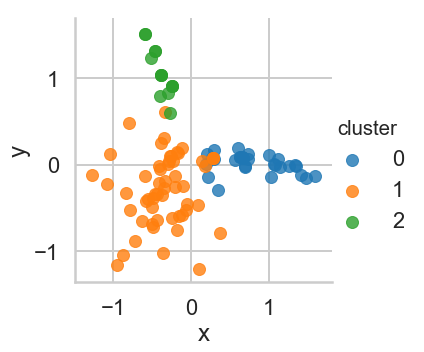

In [44]:
# ploting the Spectral Clustering
sns.lmplot(x='x', y='y', 
           hue='cluster', 
           data=matrix, 
           fit_reg=False)

In [45]:
from sklearn.cluster import AgglomerativeClustering

# use default settings and set n_clusters to 3
agc = AgglomerativeClustering(n_clusters = 3, linkage='ward').fit(x_cols)
labels= agc.labels_
matrix['cluster'] = labels
silhouette_score = metrics.silhouette_score(x_cols, labels, metric='sqeuclidean')
print('Silhouette Coefficient: {}'.format(silhouette_score))

Silhouette Coefficient: 0.1734505160934133


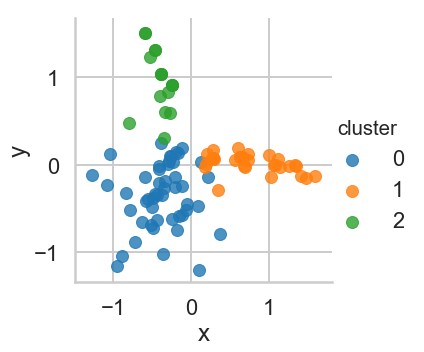

In [46]:
# Plotting Agglomerative Clustering
sns.lmplot(x='x', y='y', 
           hue='cluster', 
           data=matrix, 
           fit_reg=False)

In [47]:
# dbscan 
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(min_samples=3, eps=1.4).fit(x_cols)
labels = dbscan.labels_
matrix['cluster'] = labels
silhouette_score = metrics.silhouette_score(x_cols, labels, metric='sqeuclidean')
print('Silhouette Coefficient: {}'.format(silhouette_score))

Silhouette Coefficient: 0.02921514795306704


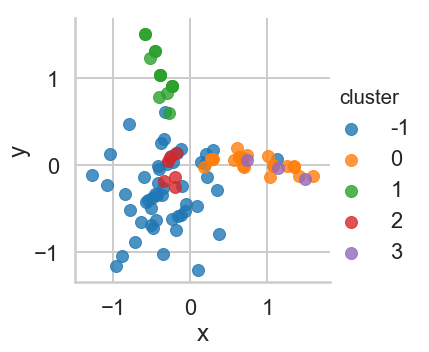

In [48]:
# Plotting the dbscan
sns.lmplot(x='x', y='y', 
           hue='cluster', 
           data=matrix, 
           fit_reg=False)

In [49]:
 from sklearn.cluster import AgglomerativeClustering

# use default settings and set n_clusters to 3
agc = AgglomerativeClustering(n_clusters = 8, linkage='ward').fit(x_cols)
labels= agc.labels_
matrix['cluster'] = labels
silhouette_score = metrics.silhouette_score(x_cols, labels, metric='sqeuclidean')
print('Silhouette Coefficient: {}'.format(silhouette_score))

Silhouette Coefficient: 0.2505679886470272


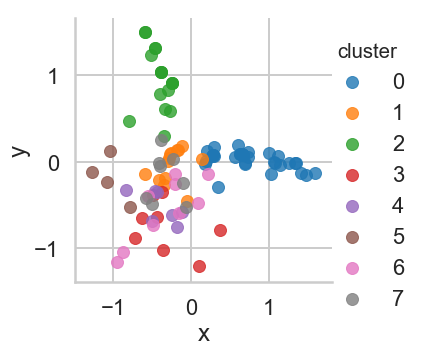

In [50]:
# Plotting the Agglomerative at 8 clusters
sns.lmplot(x='x', y='y', 
           hue='cluster', 
           data=matrix, 
           fit_reg=False)

How do their results compare? Which performs the best? Tell a story why you think it performs the best.

The "Elbow Method" choosing the number of clusters was used and the number selected previously is three for the cluster size.  The Affinity Propagation was used to determine the number of clusters and this determined 14 clusters as the best and gives a Silhouette score of 0.25.  This can be considered a very weak and or artificial structure has been found.  

The other clustering methods were set to 3 to determine the best Silhouette Score of these algorithms. The values ranged from 0.029 for the DBAN up to 0.177 for the Agglomerative Clustering method and was the highest Silhouette Score for a cluster three.  All of these values were less than 0.25 and were poor predictors for this clustering method.  The best Silhouette method which was the Agglomerative Method was set to 8 clusters to determine the silhouette score and the value was 0.25 and was the same as the clustering value of 14. 

Clustering is the process of dividing up a group of values into a set of groups and is considered an very important unsupervised learning method based in the Euclidean distance.  The problems you have with clustering is determining the number of clusters, large number of dimensions and multiple interpretations.  